In [59]:
import tensorflow as tf
from tensorflow import keras
import pydot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
tf.__version__

'2.4.1'

In [36]:
keras.__version__

'2.4.0'

In [37]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [38]:
X_train_full.shape

(60000, 28, 28)

In [39]:
X_train_full.dtype

dtype('uint8')

In [40]:
# 1. create a validation set
# 2. since we are going to train the neural network using gradient descent, we must scale the input features
# - we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
# keras.utils.plot_model(model)

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 910us/step - loss: 1.0149 - accuracy: 0.6696 - val_loss: 0.5515 - val_accuracy: 0.8100
Epoch 2/30
1719/1719 [==============================] - 1s 847us/step - loss: 0.5068 - accuracy: 0.8247 - val_loss: 0.4547 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 1s 870us/step - loss: 0.4485 - accuracy: 0.8447 - val_loss: 0.4363 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 1s 813us/step - loss: 0.4186 - accuracy: 0.8520 - val_loss: 0.3984 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 1s 816us/step - loss: 0.4004 - accuracy: 0.8607 - val_loss: 0.3891 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 1s 822us/step - loss: 0.3889 - accuracy: 0.8630 - val_loss: 0.3811 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 1s 806us/step - loss: 0.3674 - accuracy: 0.8718 - val_loss: 0.3685 -

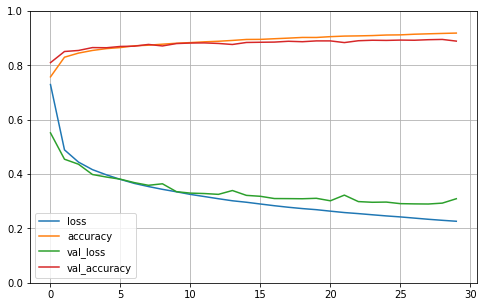

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 820us/step - loss: 62.3841 - accuracy: 0.8439


[62.38410186767578, 0.8439000248908997]

In [56]:
# Make predictions on new instances
# For each instance, the model estimates one probability per class
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
# If you only care about the class with the highest estimated probability, use the method below
# Note: mode.predict_classes(x) from the book is deprecated
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])